In [118]:
import numpy as np
import matplotlib.pyplot as plt
from src.datareader import DataReader
import overpy
from collections import defaultdict
import time

In [6]:
data_reader = DataReader("./VED_dataset/*.csv", files_limit=1)
data = data_reader.get_data()
trajectory = data[250]
trajectory

array([[ 0.00000000e+00,  4.23051058e+01, -8.36929794e+01],
       [ 8.00000000e+02,  4.23051058e+01, -8.36929794e+01],
       [ 1.80000000e+03,  4.23051058e+01, -8.36929794e+01],
       ...,
       [ 1.20640000e+06,  4.22324036e+01, -8.37392450e+01],
       [ 1.20770000e+06,  4.22324036e+01, -8.37392450e+01],
       [ 1.20880000e+06,  4.22324036e+01, -8.37392450e+01]])

In [27]:
def corners_of_map(data):
    max_long, min_long, max_lat, min_lat = -10e10, 10e10, -10e10, 10e10
    for row in data:
        max_long, min_long = max(max(row[:,1]),max_long), min(min(row[:,1]),min_long)
        max_lat, min_lat = max(max(row[:,2]),max_lat), min(min(row[:,2]),min_lat)
    return max_long, min_long, max_lat, min_lat

data_reader = DataReader("./VED_dataset/*.csv", files_limit=10)
data = data_reader.get_data()
print(corners_of_map(data))

(42.3257188889, 42.220315, -83.674, -83.8042902778)


In [35]:
def get_query_from_corners(data):
    api = overpy.Overpass()
    x1, x2 = data[1], data[0]
    y1, y2 = data[3], data[2]

    api_call = api.query(f'[out:json];node({x1},{y1},{x2},{y2}); out body;')
    return api_call

example = (42.3257188889, 42.220315, -83.674, -83.8042902778)
query = get_query_from_corners(example)

In [48]:
def get_query_from_corners(data):
    api = overpy.Overpass()
    x1, x2 = data[1], data[0]
    y1, y2 = data[3], data[2]

    api_call = api.query(f'''(node["shop"]({x1},{y1},{x2},{y2});
                node["building"="retail"]({x1},{y1},{x2},{y2});
                node["building"="supermarket"]({x1},{y1},{x2},{y2});
                node["healthcare"="pharmacy"]({x1},{y1},{x2},{y2});
                        );out tags;''')
    return api_call

example = (42.3257188889, 42.220315, -83.674, -83.8042902778)
query = get_query_from_corners(example)

In [58]:
# query.nodes

def get_query_from_corners(data):
    api = overpy.Overpass()
    x1, x2 = data[1], data[0]
    y1, y2 = data[3], data[2]

    # api_call = api.query(f'''[out:csv(::id,::lat,::lon, amenity)];node({x1},{y1},{x2},{y2}); out;''')
    api_call = api.query(f'''node({x1},{y1},{x2},{y2}); out meta;''')
    return api_call

example = (42.3257188889, 42.220315, -83.674, -83.8042902778)
query = get_query_from_corners(example)

In [65]:
query.nodes[0]

<overpy.Node id=26950035 lat=42.3001518 lon=-83.6871173>

In [33]:
def get_pois(data):
    api = overpy.Overpass()
    x1, x2 = data[1], data[0]
    y1, y2 = data[3], data[2]


    print(x1,y1,x2,y2)

    api_call = api.query(f'[out:json];way({x1},{y1},{x2},{y2}) ["highway"]; (._;>;); out body;')

    res = defaultdict(int)
    for way in api_call.ways:
        for record in way.tags:
            res[way.tags.get("highway", "n/a")] += len(way.nodes)
        # print("Name: %s" % way.tags.get("name", "n/a"))
        # print("  Highway: %s" % way.tags.get("highway", "n/a"))
        # print("  Nodes:")
        # for node in way.nodes:
        #     print("    Lat: %f, Lon: %f" % (node.lat, node.lon))

    print(res)



example = (42.3257188889, 42.220315, -83.674, -83.8042902778)
get_pois(example)

42.220315 -83.8042902778 42.3257188889 -83.674
defaultdict(<class 'int'>, {'motorway_link': 11395, 'secondary': 59884, 'service': 121486, 'tertiary': 77009, 'unclassified': 18198, 'residential': 273382, 'primary': 11857, 'cycleway': 9668, 'path': 30735, 'secondary_link': 2381, 'footway': 263779, 'track': 615, 'primary_link': 240, 'living_street': 142, 'motorway': 24716, 'pedestrian': 783, 'steps': 2648, 'tertiary_link': 265, 'raceway': 268, 'corridor': 8, 'elevator': 20, 'construction': 120, 'proposed': 42})


In [82]:
def get_shops(data):
    api = overpy.Overpass()
    x1, x2 = data[1], data[0]
    y1, y2 = data[3], data[2]

    api_call = api.query(f'''(node["shop"]({x1},{y1},{x2},{y2});
                node["building"="retail"]({x1},{y1},{x2},{y2});
                node["building"="supermarket"]({x1},{y1},{x2},{y2});
                node["healthcare"="pharmacy"]({x1},{y1},{x2},{y2});
                        );out;''')
    return api_call

example = (42.3257188889, 42.220315, -83.674, -83.8042902778)
shops_list = get_shops(example).nodes
shops_list[:10]

[<overpy.Node id=28991808 lat=42.2328031 lon=-83.7477761>,
 <overpy.Node id=29311361 lat=42.2718834 lon=-83.7768909>,
 <overpy.Node id=504396195 lat=42.2553421 lon=-83.6909212>,
 <overpy.Node id=542783623 lat=42.2825365 lon=-83.7487208>,
 <overpy.Node id=693272554 lat=42.2898259 lon=-83.7387242>,
 <overpy.Node id=748965642 lat=42.2780372 lon=-83.7409510>,
 <overpy.Node id=1121114072 lat=42.2581846 lon=-83.6870322>,
 <overpy.Node id=1121114075 lat=42.2581953 lon=-83.6862347>,
 <overpy.Node id=1712874349 lat=42.2844026 lon=-83.7460461>,
 <overpy.Node id=1828938332 lat=42.2786688 lon=-83.7484752>]

In [79]:
def get_offices(data):
    api = overpy.Overpass()
    x1, x2 = data[1], data[0]
    y1, y2 = data[3], data[2]

    api_call = api.query(f'''(node["office"]({x1},{y1},{x2},{y2});
                node["building"="office"]({x1},{y1},{x2},{y2});
                node["amenity"="bank"]({x1},{y1},{x2},{y2});
                        );out;''')
    return api_call

example = (42.3257188889, 42.220315, -83.674, -83.8042902778)
offices_list = get_offices(example).nodes

In [80]:
def get_industries(data):
    api = overpy.Overpass()
    x1, x2 = data[1], data[0]
    y1, y2 = data[3], data[2]

    api_call = api.query(f'''(node["building"="industrial"]({x1},{y1},{x2},{y2});
                node["building"="warehouse"]({x1},{y1},{x2},{y2});
                        );out;''')
    return api_call

example = (42.3257188889, 42.220315, -83.674, -83.8042902778)
industries_list = get_industries(example).nodes

In [107]:
example_point = (42.3051058, -83.6929794)
def area_around_point(point):
    t = 0.005
    lati,longi = point
    x1, x2 = round(longi-t,4), round(longi+t,4)
    y1, y2 = round(lati-t,4), round(lati+t,4)
    return x1,y1,x2,y2

area_around_point(example_point)

(-83.698, 42.3001, -83.688, 42.3101)

In [108]:
def count_in_list(listing, area):
    counter = 0
    long1,lat1,long2,lat2 = area
    for node in listing:
        if lat1 < node.lat <lat2 and long1 < node.lon < long2:
            counter+=1
            
    return counter

count_in_list(shops_list,area_around_point((example_point)))

5

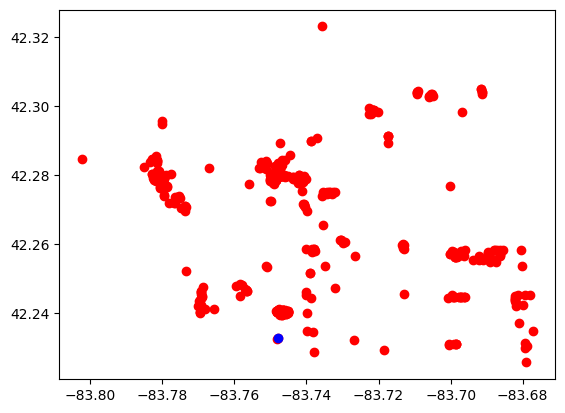

In [109]:
for node in shops_list:
    plt.scatter(node.lon,node.lat, c='red')
    
plt.scatter(-83.7477761,42.2328031, c='blue')

In [124]:
def get_listings(area):
    def get_shops(data):
        api = overpy.Overpass()
        x1, x2 = data[1], data[0]
        y1, y2 = data[3], data[2]

        api_call = api.query(f'''(node["shop"]({x1},{y1},{x2},{y2});
                    node["building"="retail"]({x1},{y1},{x2},{y2});
                    node["building"="supermarket"]({x1},{y1},{x2},{y2});
                    node["healthcare"="pharmacy"]({x1},{y1},{x2},{y2});
                            );out;''')
        return api_call
    
    def get_offices(data):
        api = overpy.Overpass()
        x1, x2 = data[1], data[0]
        y1, y2 = data[3], data[2]

        api_call = api.query(f'''(node["office"]({x1},{y1},{x2},{y2});
                    node["building"="office"]({x1},{y1},{x2},{y2});
                    node["amenity"="bank"]({x1},{y1},{x2},{y2});
                            );out;''')
        return api_call
    
    def get_industries(data):
        api = overpy.Overpass()
        x1, x2 = data[1], data[0]
        y1, y2 = data[3], data[2]

        api_call = api.query(f'''(node["building"="industrial"]({x1},{y1},{x2},{y2});
                    node["building"="warehouse"]({x1},{y1},{x2},{y2});
                            );out;''')
        return api_call
    
    shops_list = get_shops(area).nodes
    time.sleep(5)
    offices_list = get_offices(area).nodes
    time.sleep(5)
    industries_list = get_industries(area).nodes
    return shops_list, industries_list, offices_list


area = (42.3257188889, 42.220315, -83.674, -83.8042902778)
shops_list, industries_list, offices_list = get_listings(area)

In [125]:
def pois_for_point(point,shops_list, industries_list, offices_list):
    '''
    Calculates number of shops, industries and offices in close range of given point
    '''
    def area_around_point(point):
        t = 0.005
        lati,longi = point
        x1, x2 = round(longi-t,4), round(longi+t,4)
        y1, y2 = round(lati-t,4), round(lati+t,4)
        return x1,y1,x2,y2
    
    def count_in_list(listing, area):
        counter = 0
        long1,lat1,long2,lat2 = area
        for node in listing:
            if lat1 < node.lat <lat2 and long1 < node.lon < long2:
                counter+=1
        return counter
    
    aoi = area_around_point(point)
    shops_count = count_in_list(shops_list, aoi)
    industries_count = count_in_list(industries_list, aoi)
    offices_count = count_in_list(offices_list, aoi)
    
    return shops_count, industries_count, offices_count


example_point = (42.3051058, -83.6929794)
res = pois_for_point(example_point,shops_list, industries_list, offices_list)
print(f"Number of shops: {res[0]}; number of industries buildings: {res[1]}; number of offices buildings: {res[2]}")

Number of shops: 5; number of industries buildings: 0; number of offices buildings: 2


In [126]:
data_reader = DataReader("./VED_dataset/*.csv", files_limit=1)
data = data_reader.get_data()
trajectory = data[0]

matrix_of_pois = np.zeros((len(trajectory), 3))
for i, row in enumerate(trajectory):
    lat, lon = row[1], row[2]
    point = lat, lon
    matrix_of_pois[i] = pois_for_point(point,shops_list, industries_list, offices_list)
    
matrix_of_pois

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [3., 0., 1.],
       [3., 0., 1.],
       [3., 0., 1.],
       [3., 0., 1.],
       [3., 0., 1.],
       [4., 0., 4.],
       [4., 0., 4.],
       [4., 0., 4.],
       [6., 0., 4.],
       [6., 0., 4.],
       [6., 0., 4.],
       [6., 0., 4.],
       [6., 0., 4.],
       [6., 0., 4.],
       [6., 0